<a href="https://colab.research.google.com/github/yoshitapant29/ML-Models-imported/blob/main/ml_models_imported.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [70]:
def Upload(request):
    context = {}
    if request.method == "POST":
        uploaded_file = request.FILES['upload']
        fs = FileSystemStorage()
        name = fs.save(uploaded_file.name, uploaded_file)
        context['url'] = fs.url(name)
        fetch_data(name)
    return render(request, 'KNN.html', context)


def read_csv(request):
    csv_file = request.FILES['upload']
    data = pd.read_csv(csv_file)
    i = list(data.head(0))
    context = {'loaded_data': i}
    return render(request, "KNN.html", context)


def train_knn(csv_url):

    X, Y = fetch_data(csv_url)
    if X is not None and Y is not None:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
        #Preprocessing
        sc_x=StandardScaler()
        X_train=sc_x.fit_transform(X_train)
        X_test=sc_x.transform(X_test)

        #Create and train the KNN model
        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(X_train,y_train)
        #Predict on test set
        y_pred = model.predict(X_test)
        # match yhat and y and caculate accuracy and show output data on page along with accuracy
        # genrtate confusion matrix and show it on page
        #Evaluate the model

        #Calculate accuracy

        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy:", accuracy*100)

        #generate confusion matrix
        cm = confusion_matrix(y_test,y_pred)
        print("Confusion Matrix")
        print(cm)
        plt.figure()
        plt.scatter(X[:,2],X[:,3], c=Y,edgecolor='k', s=20)
        plt.title('plot')
        plt.xlabel('SepalLengthCm')
        plt.ylabel('SepalWidthCm')
        plt.show()
        plt.figure(figsize=(15,7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
        plt.ylabel('True Labels')
        plt.xlabel('Predicted Labels')
        return model,accuracy ,cm,plt



def fetch_data(url):
    #read csv through pandas dataFrame and store it in a variable df
    df = pd.read_csv(url)
    # rows, col = df.shape
    rows, cols = df.shape
    # output = fetch last column
    output= df.iloc[:,-1]
    # check output contains 1 or 0 or lables / strings for classification and float for regression
    if output.dtype in [int, float]:
        #Regression problem
        print("Error: Regression data provided. Expected classification data.")
        return None ,None
    else:
        #classification problem
        #convert labels/strings to numerical values if needed
        label_encoder = LabelEncoder()
        output = label_encoder.fit_transform(output)

        X=df.iloc[:,:-1].values
        Y=output
        return X,Y


    # If the model is classification and data is also for classification
    # show warning / error on page
    # else X = data excpet last col, data last col
    #  return X, Y






In [71]:
csv_url = "/content/Iris.csv"

Accuracy: 100.0
Confusion Matrix
[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


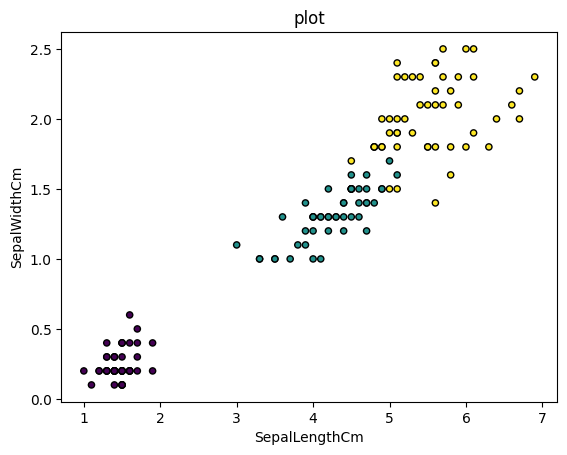

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

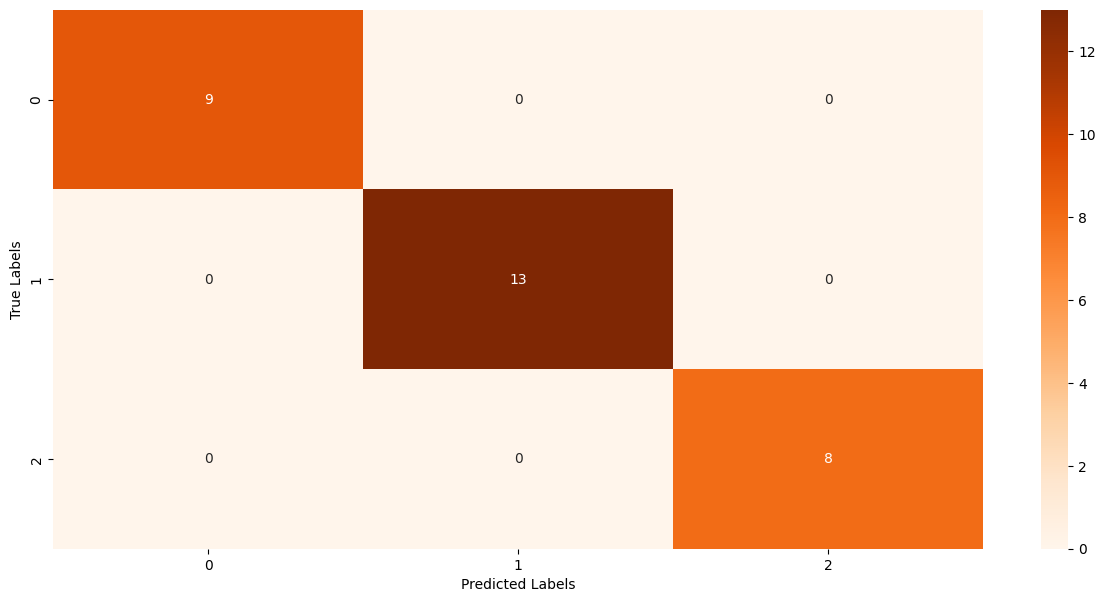

In [72]:
train_knn(csv_url)
fetch_data(csv_url)